In [59]:
from astropy.coordinates import EarthLocation, AltAz, SkyCoord, GCRS
from astropy import units as u
from astropy.time import Time
import numpy as np
from datetime import datetime, timedelta

start_time = datetime(2025, 2, 21, 12, 0, 0)
current_time = start_time

vla = EarthLocation.of_site('vla')
source = SkyCoord(ra=10*u.hourangle, dec=-30*u.deg, frame='icrs')

antenna_1_pos = np.array([0,0,0])
antenna_2_pos = np.array([10,200,10])   
baseline = antenna_2_pos - antenna_1_pos

obs_frequency = 1_000_000
obs_wavelength = 3.0 * 10**8 / obs_frequency 


uvs = []

for i in range(5000):
    current_time = current_time + timedelta(minutes=1)
    obs_time = Time(current_time.isoformat())
    
    obs_frame = AltAz(obstime=obs_time, location=vla)
    source_altaz = source.transform_to(obs_frame)
    
    source_az = source_altaz.az
    source_alt = source_altaz.alt

    uvw_transform_matrix = np.array([[np.sin(source_az), np.cos(source_az), 0],[-np.sin(source_alt)*np.cos(source_az), np.sin(source_alt)*np.sin(source_az), np.cos(source_alt)],[np.cos(source_alt) * np.cos(source_az), -np.cos(source_alt) * np.sin(source_az), np.sin(source_alt)]])
    baseline_uvw = np.matmul(uvw_transform_matrix, baseline) / obs_wavelength
    uvs.append(baseline_uvw[:2])

uvs = np.array(uvs)

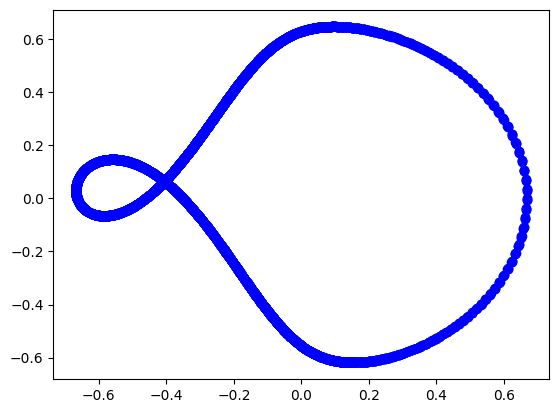

In [60]:
import matplotlib.pyplot as plt

plt.scatter(uvs[:,0], uvs[:,1], color='blue')

plt.show()
